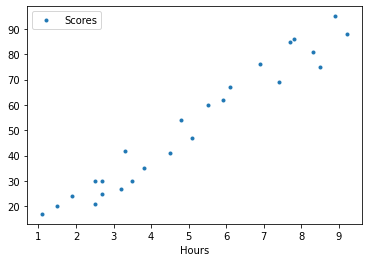

In [1]:
#Plotting the linear graph of Hours studied v/s Scores Obtained

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plot  
%matplotlib inline

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

data.plot(x ='Hours', y ='Scores',style = ".")
plot.show()


In [2]:
#In this step data is divided into attributes and labels and split into training and testing sets

x = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Data Preperation Complete")

Data Preperation Complete


In [3]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train, y_train) 

print("Training complete")


Training complete


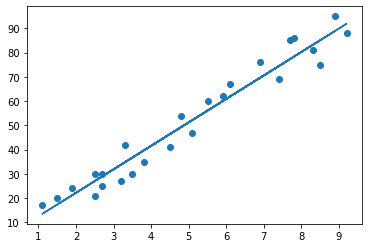

In [4]:
#Plotting the regression line along with data
r_line = regression.coef_*x + regression.intercept_

plot.scatter(x, y)
plot.plot(x, r_line);
plot.show()

In [6]:
# Checking the accuracy of our Training and Test DataSets


print('Both the sets are accurate with values :')

print('Test Set = ',regression.score(x_test, y_test))
print('Training Set = ',regression.score(x_train, y_train))
          

Both the sets are accurate with values :
Test Set =  0.9678055545167994
Training Set =  0.9491209376364416


In [7]:
# Making Predictions from the Test Set

prediction = regression.predict(x_test)

# We can see the comparison between Actual Scores and Predicted Scores

df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
print(df)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [8]:
# Predicting the Marks for user provides hours of study

hours = [[input()]]
myprediction = regression.predict(hours)
print('Student studying for',hours,'hours will obtain',myprediction,'marks according to this model.')

Student studying for [['9.5']] hours will obtain [94.80663482] marks according to this model.


C:\Users\divya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [9]:
import pickle
pickle.dump(regression, open('C:/users/divya/model.pkl','wb'))

In [10]:
model = pickle.load(open('C:/users/divya/model.pkl','rb'))
print(model.predict([[1.8]]))

[20.25463303]
